---

## **Data Visualisation Case study - International Football results from 1872 to 2020**

---

### Parameshwari S - CB.SC.I5DAS18026

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime 
from statsmodels.graphics.mosaicplot import mosaic
import squarify
import matplotlib.colors as mcolors
from geopy.geocoders import Nominatim
import folium
import math
sns.set_theme(style="darkgrid")

In [ ]:
df = pd.read_csv("/content/results.csv")
df.head(10)

date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False
5  1876-03-25  Scotland     Wales  ...  Glasgow  Scotland   False
6  1877-03-03   England  Scotland  ...   London   England   False
7  1877-03-05     Wales  Scotland  ...  Wrexham     Wales   False
8  1878-03-02  Scotland   England  ...  Glasgow  Scotland   False
9  1878-03-23  Scotland     Wales  ...  Glasgow  Scotland   False

[10 rows x 9 columns]

In [ ]:
df.shape

(41876, 9)

In [ ]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
df.describe()

home_score    away_score
count  41876.000000  41876.000000
mean       1.744293      1.186503
std        1.752248      1.403053
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41876 entries, 0 to 41875
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41876 non-null  object
 1   home_team   41876 non-null  object
 2   away_team   41876 non-null  object
 3   home_score  41876 non-null  int64 
 4   away_score  41876 non-null  int64 
 5   tournament  41876 non-null  object
 6   city        41876 non-null  object
 7   country     41876 non-null  object
 8   neutral     41876 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

date home_team away_team  home_score  ...   country neutral  year month
0  1872-11-30  Scotland   England           0  ...  Scotland   False  1872    11
1  1873-03-08   England  Scotland           4  ...   England   False  1873     3
2  1874-03-07  Scotland   England           2  ...  Scotland   False  1874     3
3  1875-03-06   England  Scotland           2  ...   England   False  1875     3
4  1876-03-04  Scotland   England           3  ...  Scotland   False  1876     3

[5 rows x 11 columns]

In [ ]:
df = df[df.year != 2020]
df.shape

(41590, 11)

## 1. Evolution of football 

In [ ]:
df_year = df.groupby(by = 'year', as_index = False)['home_team'].count()
df_year.rename(columns = {'home_team' : 'Number of matches'}, inplace = True)
fig1 = px.line(df_year, x = 'year', y = 'Number of matches')
#fig1.update_xaxes(type = 'category')
fig1.update_layout(title_text = 'Matches played in each year', title_x = 0.48)
fig1.show()

## 2. Top 10 tournaments with most number of matches

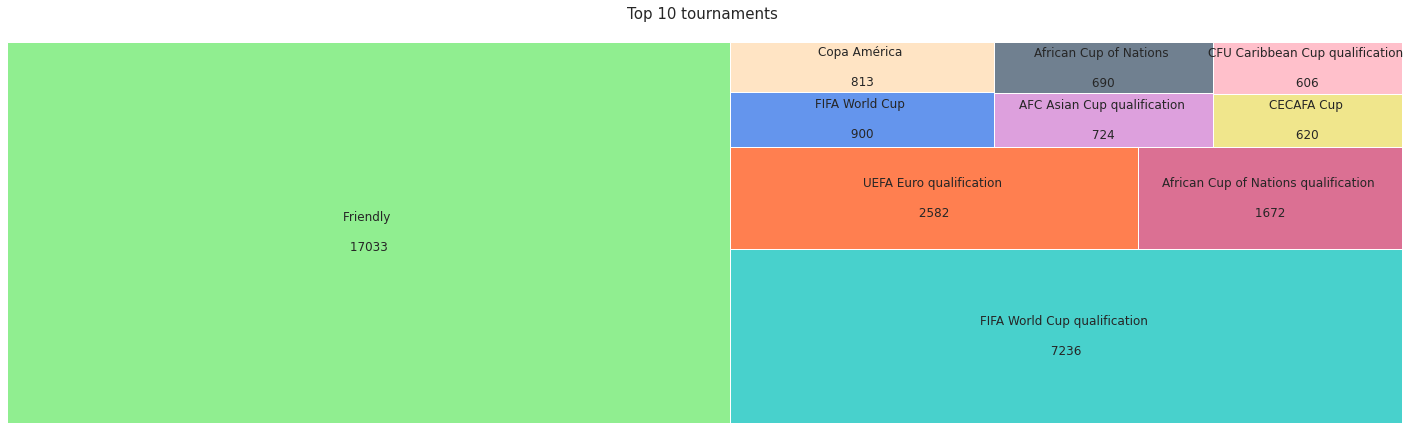

In [ ]:
x = df.groupby('tournament')[['home_team']].count().sort_values(by = 'home_team', ascending = False)
x.rename(columns = {'home_team' : 'Number of matches'}, inplace = True)

plt.figure(figsize = (27, 7))
labels = ["%s \n \n %d " % (label) for label in zip(x.index[:10], x['Number of matches'].iloc[:10])]
colors = ['lightgreen', 'mediumturquoise', 'coral', 'palevioletred', 'cornflowerblue', 'bisque', 'plum', 'slategrey', 'khaki', 'pink']
squarify.plot(sizes = x['Number of matches'].iloc[:10], label = labels, alpha = 1, color = colors)
plt.title("Top 10 tournaments \n", fontsize = 15)
plt.axis('off')
plt.show()

## 3. Team that played most number of matches

In [ ]:
tournaments_of_interest = ['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
                           'African Cup of Nations qualification', 'FIFA World Cup', 'Other']
cdf1 = df[['home_team', 'tournament']].rename(columns = {'home_team': 'team'})
cdf2 = df[['away_team', 'tournament']].rename(columns = {'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis = 0, ignore_index = True)
cdf['count'] = 1
cdf_piv = cdf.pivot_table(values = 'count', index = 'team', columns = 'tournament', aggfunc = np.sum, fill_value = 0)
tournament_counts = cdf['tournament'].value_counts(sort = True, ascending = False)
teams = df['home_team'].append(df['away_team'], ignore_index = True)
team_counts = teams.value_counts().sort_values(ascending = False).head(10)
s_df = pd.DataFrame(columns = tournaments_of_interest, index = team_counts.index)
for i in range(s_df.shape[0]):
    t = s_df.index[i]
    team_tournament_counts = []
    for col in s_df.columns:
        if col != 'Other':
            team_tournament_counts.append(cdf_piv.loc[t, col])
        else:
            team_tournament_counts.append(team_counts.loc[t] - np.sum(team_tournament_counts))
    s_df.loc[t, :] = team_tournament_counts

In [ ]:
a = []
for i in s_df.index:
  a += 6 * [i]
b = []
for i in range(0,10):
  for j in tournaments_of_interest:
    b.append(j)
c = []
for i in range(len(s_df)):
  c.append(s_df['Friendly'][i])
  c.append(s_df['FIFA World Cup qualification'][i])
  c.append(s_df['UEFA Euro qualification'][i])
  c.append(s_df['African Cup of Nations qualification'][i])
  c.append(s_df['FIFA World Cup'][i])
  c.append(s_df['Other'][i])

In [ ]:
df_team = pd.DataFrame()
df_team["Teams"] = a
df_team["Tournament"] = b
df_team["Number of matches"] = c
fig2 = px.bar(df_team, x = "Teams", y = "Number of matches", color = "Tournament")
fig2.update_layout(title_text = "Top 10 teams that played highest number of matches", title_x = 0.42)
fig2.show()

## 4. Number of teams over the years

In [ ]:
x = df[['home_team', 'year']].rename(columns = {'home_team': 'Teams'})
y = df[['away_team', 'year']].rename(columns = {'away_team': 'Teams'})
z = pd.concat([x, y], axis = 0, ignore_index = True)
a = z.groupby('year')

team = []
count = []
year = []
for i in range(1872, 2020):
  year.append(i)
  for j in range(len(a.get_group(i).Teams.unique())):
    if a.get_group(i).Teams.unique()[j] not in team:
      team.append(a.get_group(i).Teams.unique()[j])
  count.append(len(team))

In [ ]:
df_teams = pd.DataFrame()
df_teams["Year"] = year
df_teams["Number of teams"] = count
fig3 = px.line(df_teams, x = "Year", y = "Number of teams")
fig3.update_layout(title_text = "Number of teams over the years", title_x = 0.48)
fig3.show()

## 5. Number of wins in each country

In [ ]:
df['winner'] = ' '
df['loser'] = ' '
for i in range(len(df)):
  if df['home_score'].loc[i] > df['away_score'].loc[i]:
    df['winner'].loc[i] = df['home_team'].loc[i]
    df['loser'].loc[i] = df['away_team'].loc[i]
  elif df['away_score'].loc[i] > df['home_score'].loc[i]:
    df['winner'].loc[i] = df['away_team'].loc[i]
    df['loser'].loc[i] = df['home_team'].loc[i]
  else:
    df['winner'].loc[i] = 'Draw'
    df['loser'].loc[i] = 'Draw'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x = df.copy()
x.drop(df.loc[:, x.columns != 'winner'].columns, axis = 1, inplace = True)
x.drop(x[x['winner'] == 'Draw'].index, inplace = True)
x['wins'] = ''
y = x.groupby('winner')[['wins']].count().sort_values(by = 'wins', ascending = False)
y.reset_index(inplace = True)
y.rename(columns = {'winner' : 'Country', 'wins' : 'Number of wins'}, inplace = True)

In [ ]:
fig4 = px.choropleth(y, locations = "Country", locationmode = 'country names',
                    color = "Number of wins", 
                    #hover_name = "popup", 
                    color_continuous_scale = px.colors.sequential.Plasma)
fig4.update_layout(title_text = 'Number of wins in each country', title_x = 0.48)
fig4.show()

## 6. Teams with highest number of goals

In [ ]:
x = df[['home_team', 'home_score']].rename(columns = {'home_team': 'Teams', 'home_score': 'home_goals'})
y = df[['away_team', 'away_score']].rename(columns = {'away_team': 'Teams', 'away_score': 'away_goals'})
z = pd.concat([x, y], axis = 0, ignore_index = True)
z = z.groupby('Teams').sum()#.sort_values(by = 'Goals', axis = 0, ascending = False).head(20)
z['Total'] = z['home_goals'] + z['away_goals']
z = z.sort_values(by = 'Total', axis = 0, ascending = False).head(20)
z.reset_index(inplace = True)

In [ ]:
teams = []
for i in z.Teams:
  teams.append(i)
  teams.append(i)
typ_e = []
for i in range(0,20):
  typ_e.append("home_goal")
  typ_e.append("away_goal")

count = []
for i,j in zip(z.home_goals, z.away_goals):
  count.append(i)
  count.append(j)

In [ ]:
df_goal = pd.DataFrame()
df_goal["Teams"] = teams
df_goal["Type"] = typ_e
df_goal["Goals"] = count
fig5 = px.bar(df_goal, x = "Teams", y = "Goals", color = "Type")
fig5.update_layout(title_text = "Teams with highest number of Goals", title_x = 0.46)
fig5.show()

## 7. Percentage of matches that ended in draw

Text(0.5, 1.0, 'Percentage of Matches that Ended in Draw')

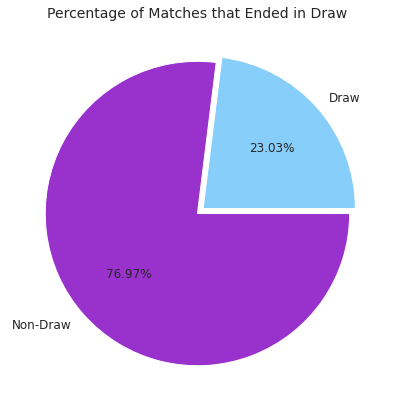

In [ ]:
draw_perc = df[df.winner == 'Draw'].shape[0] / df.shape[0]
plt.figure(figsize = (10, 7))
plt.pie([draw_perc, 1 - draw_perc], explode = [0.05, 0], labels = ['Draw', 'Non-Draw'], autopct = '%.2f%%', 
       colors = ['lightskyblue', 'darkorchid'], textprops = {'fontsize': 12})
plt.title('Percentage of Matches that Ended in Draw', fontsize = 14)

## 8. Number of matches hosted by different venues

In [ ]:
venue = df.groupby('city')[['home_team']].count().sort_values(by = 'home_team', ascending = False)
venue.rename(columns = {'home_team' : 'Number of matches hosted'}, inplace = True)

In [ ]:
geolocator = Nominatim()
lat = []
long = []
for i in venue.index:
  try:
    loc = geolocator.geocode(i)
    lat.append(loc.latitude)
    long.append(loc.longitude)
  except Exception as e:
    lat.append(0)
    long.append(0)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [ ]:
venue['Lat'] = lat
venue['Long'] = long
venue.reset_index(inplace = True)
venue["popup"] = venue["city"] + '  ' + venue["Number of matches hosted"].astype(str)

In [ ]:
m = folium.Map(location = [20,0], tiles = "OpenStreetMap", zoom_start = 2)
for i in range(0,len(venue)):
  folium.Circle(
      location = [venue.iloc[i]['Lat'], venue.iloc[i]['Long']],
      popup = venue.iloc[i]['popup'],
      radius = int(venue.iloc[i]['Number of matches hosted'])*2500,
      color = '#69b3a2',
      fill = True,
      fill_color = '#69b3a2'
   ).add_to(m)
m

## 9. Home score vs Away score for each tournament.

In [ ]:
dft = df.groupby('tournament')[['home_score', 'away_score']].sum()
dft['total'] = dft['home_score'] + dft['away_score']
dft.sort_values(by = 'total',ascending = False, inplace = True)

In [ ]:
tour = []
for i in dft.index[:10]:
  tour.append(i)
  tour.append(i)
score = []
for i in range(len(dft[:10])):
  score.append("home_score")
  score.append("away_score")

value = []
for i,j in zip(dft.home_score[:10], dft.away_score[:10]):
  value.append(i)
  value.append(j)

In [ ]:
df_score = pd.DataFrame()
df_score["Tournaments"] = tour
df_score["Type"] = score
df_score["Score"] = value
fig6 = px.bar(df_score, x = "Tournaments", y = "Score", color = "Type", barmode='group')
fig6.update_layout(title_text = "Tournaments with highest scores", title_x = 0.46)
fig6.show()

##10. Evolution of goals scored


In [ ]:
total_scores = df[['home_score','away_score','country','month','year']]
total_scores['total_score'] = total_scores['home_score'] + total_scores['away_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(201.5, 0.5, 'Months')

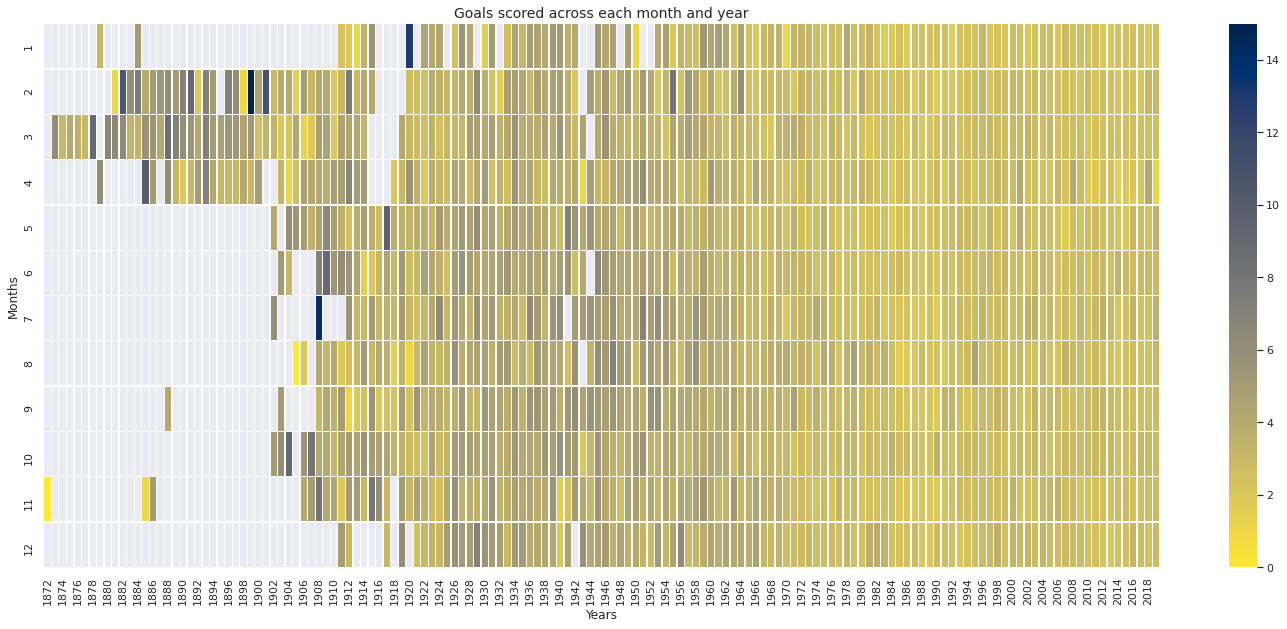

In [ ]:
plt.figure(figsize=(25,10))
dj = total_scores.pivot_table(index='month',columns='year',values='total_score')
sns.heatmap(dj,cmap='cividis_r',linecolor='white', lw = 0.3)
plt.title('Goals scored across each month and year', fontsize = 14)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Months', fontsize = 12)

## 11. Brazil's performance over years

In [ ]:
x = df[df['home_team'] == 'Brazil']
y = df[df['away_team'] == 'Brazil']
x['goal'] = x['home_score']
y['goal'] = y['away_score']
brazil = pd.concat([x, y], axis = 0, ignore_index = True)
brazil['match'] = ''
for i in range(len(brazil)):
  if brazil['winner'].loc[i] == 'Brazil':
    brazil['match'].loc[i] = 'won'
  elif brazil['loser'].loc[i]== 'Brazil':
    brazil['match'].loc[i] = 'lost'
  else:
    brazil['match'].loc[i] = 'draw'
brazil['matches played'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [ ]:
x = brazil.groupby(['year', 'match'])[['matches played']].count()
x.reset_index(inplace = True)
fig7 = px.bar(x, x = 'year', y = 'matches played', color = 'match')
fig7.update_layout(title_text = "Brazil's performance over years", title_x = 0.46)
fig7.show()

## 12. Wins and loses on different venues for Brazil

(<Figure size 720x504 with 3 Axes>,
 OrderedDict([(('True', 'draw'),
               (0.0, 0.0, 0.33306082901868167, 0.16447368421052633)),
              (('True', 'lost'),
               (0.0,
                0.17105263157894737,
                0.33306082901868167,
                0.16746411483253593)),
              (('True', 'won'),
               (0.0,
                0.34509569377990434,
                0.33306082901868167,
                0.6549043062200958)),
              (('False', 'draw'),
               (0.3429618191176916,
                0.0,
                0.6570381808823084,
                0.21828765462042207)),
              (('False', 'lost'),
               (0.3429618191176916,
                0.22486660198884312,
                0.6570381808823084,
                0.15310453553237935)),
              (('False', 'won'),
               (0.3429618191176916,
                0.3845500848896435,
                0.6570381808823084,
                0.6154499151103566))]))

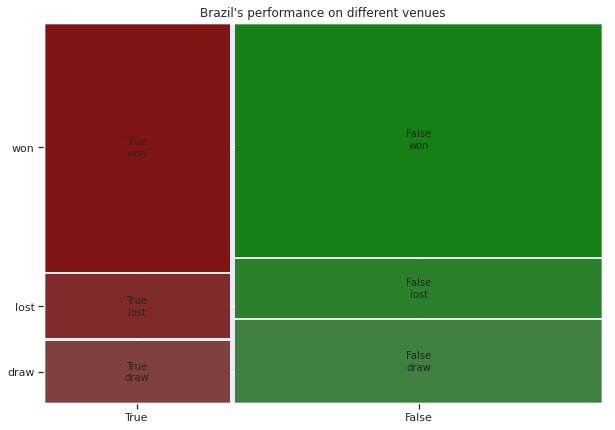

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
mosaic(brazil, ['neutral', 'match'], gap = 0.01, title = "Brazil's performance on different venues")

## 13. Top 10 rivalries and their performance

In [ ]:
copy_df = df.copy()
copy_df['matches_played'] = 1
def get_winner(row):
    winner = ""
    if row['home_score'] > row['away_score']:
        winner = row['home_team']
    elif row['home_score'] < row['away_score']:
        winner = row['away_team']
    else:
        winner = np.nan
    return winner

def sum_home_team_matches(row):
    winner = get_winner(row)
    if winner == row['home_team']:
        return 1
    elif winner == row['away_team']:
        return 0
    else: 
        return np.nan

def sum_away_team_matches(row):
    winner = get_winner(row)
    if winner == row['away_team']:
        return 1
    elif winner == row['home_team']:
        return 0
    else: 
        return np.nan


copy_df['home_win'] = copy_df.apply(lambda x : sum_home_team_matches(x), axis=1)
copy_df['away_win'] = copy_df.apply(lambda x : sum_away_team_matches(x), axis=1)
results = copy_df.groupby(by=['home_team','away_team']).sum()[['matches_played','home_win','away_win']].reset_index()
shifted_results = results.copy()
shifted_results.loc[shifted_results['home_team']>shifted_results['away_team'],
                    ['home_team','away_team','home_win','away_win'] ] = (
                        shifted_results.loc[shifted_results['home_team']>shifted_results['away_team'], 
                                            ['away_team','home_team','away_win','home_win'] ].values)
results = shifted_results.groupby(by=['home_team','away_team']).sum().reset_index()
sorted_results = results.sort_values(by=['matches_played'],ascending=False)
sorted_results['rivalries'] = sorted_results['home_team'] + ' vs ' + sorted_results['away_team']
sorted_results.reset_index(inplace=True)
sorted_results.head(10)

index  home_team    away_team  ...  home_win  away_win               rivalries
0    502  Argentina      Uruguay  ...      81.0      52.0    Argentina vs Uruguay
1    724    Austria      Hungary  ...      40.0      67.0      Austria vs Hungary
2   1124    Belgium  Netherlands  ...      40.0      54.0  Belgium vs Netherlands
3   3230    England     Scotland  ...      48.0      42.0     England vs Scotland
4   5003      Kenya       Uganda  ...      32.0      41.0         Kenya vs Uganda
5   6036     Norway       Sweden  ...      24.0      58.0        Norway vs Sweden
6   2938    Denmark       Sweden  ...      40.0      46.0       Denmark vs Sweden
7   6474   Scotland        Wales  ...      61.0      23.0       Scotland vs Wales
8    436  Argentina       Brazil  ...      37.0      43.0     Argentina vs Brazil
9   3245    England        Wales  ...      67.0      15.0        England vs Wales

[10 rows x 7 columns]

Text(0.5, 1.0, 'Top 10 rivalries')

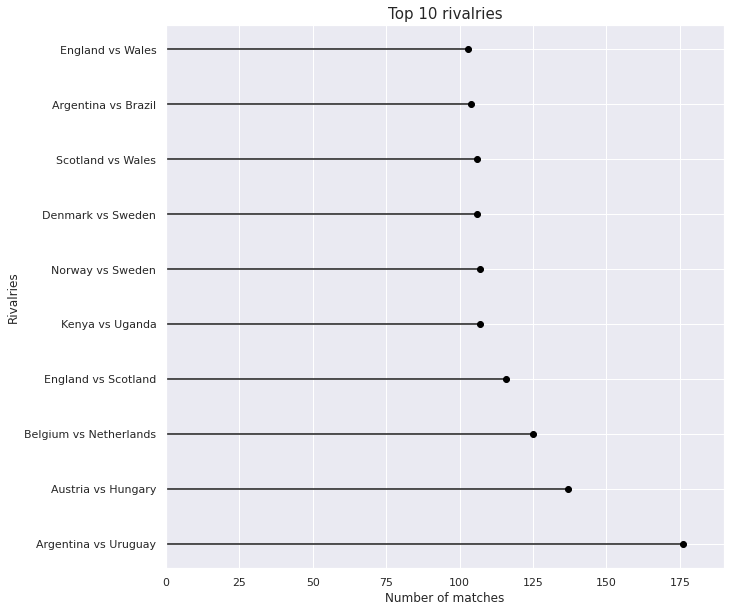

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.hlines(sorted_results['rivalries'].head(10), xmin=0, xmax=sorted_results['matches_played'].head(10))
ax.plot(sorted_results['matches_played'].head(10), sorted_results['rivalries'].head(10), "o", color='black')
ax.set_xlim(0, 190)
ax.set_xlabel("Number of matches", fontsize = 12)
ax.set_ylabel("Rivalries", fontsize = 12)
ax.set_title("Top 10 rivalries", fontsize = 15)

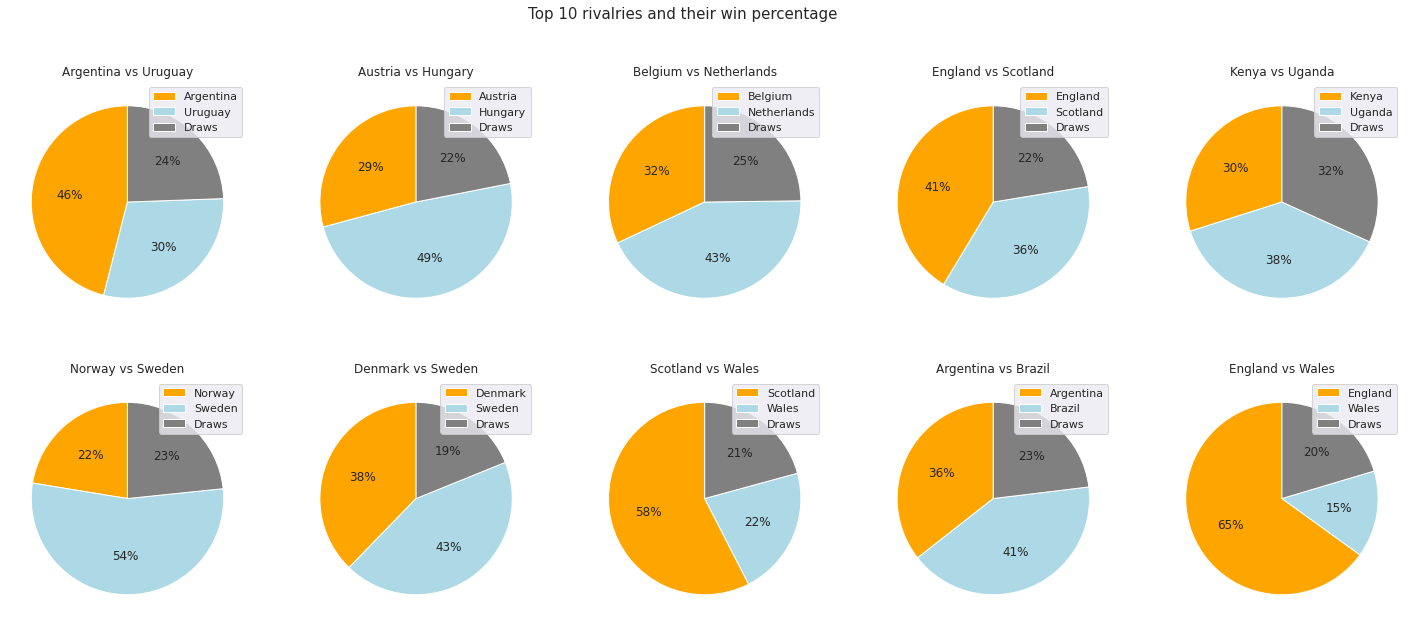

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25, 10))
colors = ['orange', 'lightblue', 'grey']
x = 0
for i in range(2):
    for j in range(5):
        t1 = sorted_results['home_win'][x]*100/sorted_results['matches_played'][x]
        t2 = sorted_results['away_win'][x]*100/sorted_results['matches_played'][x]
        draw = 100 - t1 - t2
        sizes = [t1,t2,draw]
        t1name = sorted_results['home_team'][x]
        t2name = sorted_results['away_team'][x]
        labels = [t1name, t2name, 'Draws']
        ax[i,j].pie(sizes, startangle = 90, colors = colors, autopct = '%1.f%%')#, shadow = True)
        ax[i,j].set_title(t1name + " vs " + t2name)
        ax[i,j].legend(labels = labels, loc = 'upper right')#, bbox_to_anchor=(0, 0, 0.1, 1))
        x += 1
plt.suptitle('Top 10 rivalries and their win percentage', fontsize = 15)
plt.show()

## 14. Distribution of goals in Friendly vs Non-Friendly matches

In [ ]:
f = df[df['tournament'] == 'Friendly']
nf =df[df['tournament'] != 'Friendly']
f['total goals'] = f['home_score'] + f['away_score']
nf['total goals'] = nf['home_score'] + nf['away_score']
nf['tournament'] = 'Non-friendly'
f_nf = pd.concat([f, nf], axis = 0, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
fig8 = px.violin(f_nf, y = "total goals", x= "tournament", color = 'neutral', box = True)
fig8.update_layout(title_text = "Distribution of home and away goals in Friendly and Non-friendly matches", title_x = 0.46)
fig8.show()

##15. Results density

In [ ]:
df['matches'] = 1
x = df.groupby(['home_score', 'away_score'])[['matches']].count().reset_index()
x['number of matches'] = ''
for i in range(len(x)):
  if x['matches'].loc[i] < 10:
    x['number of matches'].loc[i] = '<10'
  elif x['matches'].loc[i] >= 10 and x['matches'].loc[i] < 100:
    x['number of matches'].loc[i] = '10-100'
  elif x['matches'].loc[i] >= 100 and x['matches'].loc[i] < 1000:
    x['number of matches'].loc[i] = '100-1000'
  elif x['matches'].loc[i] >= 1000 and x['matches'].loc[i] < 3000:
    x['number of matches'].loc[i] = '1000-3000'
  else:
    x['number of matches'].loc[i] = '>3000'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig9 = px.scatter(x, x = 'home_score', y = 'away_score', color = 'matches', color_continuous_scale = px.colors.sequential.Aggrnyl)
fig9.update_layout(title_text = "Results density", title_x = 0.48)
fig9.show()

##16. Teams with absolute (Wins-Losses)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Text(0.5, 0, 'Teams')

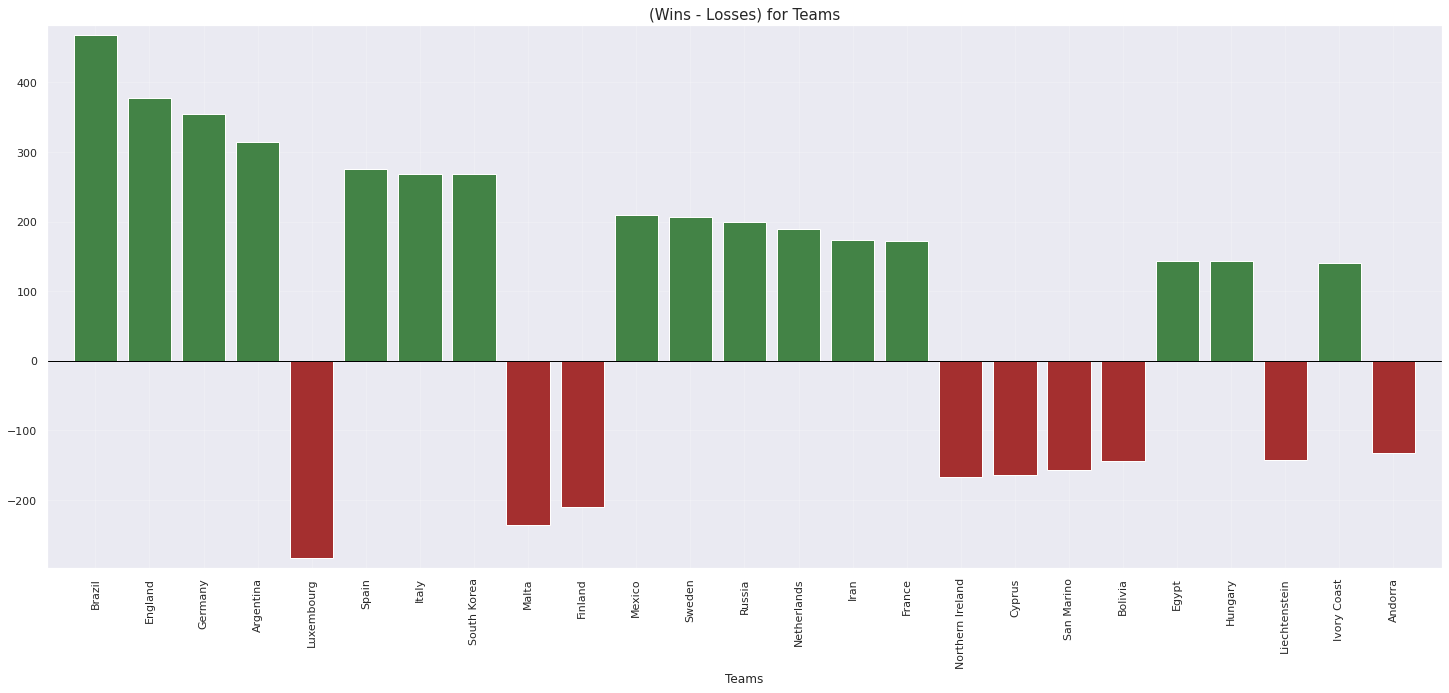

In [ ]:
cdf = df[df.winner != 'draw']
winner_counts = cdf.winner.value_counts().sort_values(ascending=False)
loser_counts = cdf.loser.value_counts().sort_values(ascending=False)
teams = set(winner_counts.index.values.tolist() + loser_counts.index.values.tolist())
wins_minus_losses = pd.Series()
for team in teams:
    wins_minus_losses[team] = winner_counts.get(team, 0) - loser_counts.get(team, 0)
wins_minus_losses = wins_minus_losses.reindex(wins_minus_losses.abs().sort_values(ascending=False).index).head(25)
pos = wins_minus_losses[wins_minus_losses >= 0]
pos = [(i, v) if v >= 0 else (i, 0) for i,v in zip(wins_minus_losses.index, wins_minus_losses.values)]
pos = pd.Series(dict(pos))
neg = wins_minus_losses[wins_minus_losses < 0]
neg = [(i, v) if v < 0 else (i, 0) for i,v in zip(wins_minus_losses.index, wins_minus_losses.values)]
neg = pd.Series(dict(neg))
fig, ax = plt.subplots(figsize=(25,10));
sns.barplot(x = pos.index, y = pos.values, color = '#388e3c', ax = ax);
sns.barplot(x = neg.index, y = neg.values, color = '#b71c1c', ax = ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
ax.axhline(y=0, color='black', linewidth=1);
ax.margins(0.02);
ax.grid(True, alpha=0.2);
plt.title('(Wins - Losses) for Teams', fontsize = 15)
plt.xlabel("Teams", fontsize = 12)

##17. Home wins, Away wins and Draw matches over years

In [ ]:
df['Type'] = ' '
for i in range(len(df)):
  if df['home_score'].loc[i] > df['away_score'].loc[i]:
    df['Type'].loc[i] = 'home win'
  elif df['away_score'].loc[i] > df['home_score'].loc[i]:
    df['Type'].loc[i] = 'away win'
  else:
    df['Type'].loc[i] = 'Draw'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x = df.groupby(['year', 'Type']).count()
x.reset_index(inplace = True)
wins = x[['year', 'Type', 'home_team']]
wins.rename(columns = {'home_team' : 'Number of matches'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig9 = px.area(wins, x = "year", y = "Number of matches", color = "Type")
fig9.update_layout(title_text = "Home wins, Away wins and Draw matches over years", title_x = 0.46)
fig9.show()